# **Marketing econometrics** 

## Project 2 - clients' repurchases Prediction
 
    Group:  Group K
    Member: HUANG XURAN
            RU YUN
            FU JINGXIN
    Date:   15/11/2021

## **Part 0: Preparation of packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

## **Part 1: Import data**

In [2]:
train_transaction = pd.read_csv("Train_transactions.csv")
test_transaction = pd.read_csv("Test_transactions.csv")
train_customer = pd.read_csv("Train_customers_repurchase.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_transaction.head()

,id_client,transaction_date,stores_nb,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,payment_card,email_domain,civility,zip_code,card_subscription,multicard,price_segmentation
0,37520523,2019-12-26T16:44:00.000Z,12015,57,138.69,0.49,138.20,0,0,1,0,NaN,MME,12420,NaN,0.0,NaN
1,84917629,2019-08-01T12:16:00.000Z,77131,6,9.87,0.00,9.87,0,0,1,0,NaN,MME,77450,NaN,0.0,NaN
2,20962900,2019-09-25T18:10:00.000Z,92786,6,26.25,2.21,24.04,0,0,0,1,GMAIL.COM,MME,92110,NaN,0.0,Quali
3,85917543,2020-01-24T17:34:00.000Z,21554,5,15.08,0.00,15.08,0,0,0,1,SFR.FR,M,21130,NaN,0.0,Mixte
4,6861392,2019-08-22T19:28:00.000Z,83820,25,81.16,30.60,50.56,0,0,0,1,ORANGE.FR,MME,83600,NaN,0.0,Mixte


In [4]:
train_transaction[train_transaction['id_client']==31479376].sort_values('transaction_date')

,id_client,transaction_date,stores_nb,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,payment_card,email_domain,civility,zip_code,card_subscription,multicard,price_segmentation
1482781,31479376,2019-08-08T13:18:00.000Z,78387,2,6.81,0.00,6.81,0,0,1,0,FREE.FR,M,78890,NaN,0.0,NaN
989973,31479376,2019-09-28T11:25:00.000Z,78387,8,42.49,0.00,42.49,0,0,1,0,FREE.FR,M,78890,NaN,0.0,NaN
1543625,31479376,2019-10-12T17:44:00.000Z,78387,26,69.66,18.00,51.66,0,0,1,0,FREE.FR,M,78890,NaN,0.0,NaN
865443,31479376,2019-11-07T18:28:00.000Z,78387,5,2.40,0.82,1.58,0,0,1,0,FREE.FR,M,78890,NaN,0.0,NaN
3096670,31479376,2019-11-16T16:20:00.000Z,78387,3,6.33,0.00,6.33,0,0,0,1,FREE.FR,M,78890,NaN,0.0,NaN
508508,31479376,2019-11-20T10:45:00.000Z,78387,7,14.45,0.00,14.45,0,0,0,1,FREE.FR,M,78890,NaN,0.0,NaN
412304,31479376,2019-11-21T17:29:00.000Z,78387,2,4.30,0.00,4.30,0,0,1,0,FREE.FR,M,78890,NaN,0.0,NaN
3049701,31479376,2019-11-25T17:31:00.000Z,78387,12,25.31,2.53,22.78,0,0,0,1,FREE.FR,M,78890,NaN,0.0,NaN
520889,31479376,2019-11-27T16:51:00.000Z,78387,4,9.40,0.94,8.46,0,0,1,0,FREE.FR,M,78890,NaN,0.0,NaN
3228838,31479376,2019-12-01T11:15:00.000Z,78387,7,42.28,4.23,38.05,0,0,0,1,FREE.FR,M,78890,NaN,0.0,NaN


In [5]:
train_transaction.id_client.value_counts()

84740485    3019
33665648    2889
18897479    2456
12227731    1334
37027436    1226
            ... 
37316255       1
38051323       1
39505457       1
35552935       1
38551568       1
Name: id_client, Length: 160424, dtype: int64

160424 clients in this train_transaction dataset.

In [6]:
test_transaction.head()

,id_client,transaction_date,stores_nb,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,payment_card,email_domain,civility,zip_code,card_subscription,multicard,price_segmentation
0,28786736,2019-12-06T11:26:00.000Z,31906,24,35.08,0.0,35.08,0,1,0,0,NaN,MME,31200,NaN,0.0,Access
1,15243133,2020-03-09T12:21:00.000Z,38579,5,7.90,0.0,7.90,0,0,0,1,FREE.FR,MME,38360,NaN,0.0,Mixte
2,83947833,2019-12-11T09:46:00.000Z,19330,8,22.86,0.0,22.86,0,0,1,0,ORANGE.FR,MME,19100,NaN,0.0,Access
3,16108194,2019-08-24T19:04:00.000Z,69130,2,10.99,0.0,10.99,0,0,0,1,NaN,MME,69003,NaN,0.0,Quali
4,7619400,2020-03-25T09:50:00.000Z,38990,10,32.42,0.0,32.42,0,0,0,1,NaN,MME,38100,NaN,0.0,Quali


In [7]:
test_transaction[test_transaction['item_count']<0]

,id_client,transaction_date,stores_nb,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,payment_card,email_domain,civility,zip_code,card_subscription,multicard,price_segmentation
36,38214368,2019-09-09T16:28:00.000Z,94803,-1,-23.45,0.00,-23.45,0,0,0,0,GMAIL.COM,M,94100,NaN,0.0,Mixte
1394,10321124,2019-11-27T14:54:00.000Z,7317,-1,-149.99,0.00,-149.99,0,0,0,1,ORANGE.FR,MME,7790,NaN,1.0,NaN
2005,3900769,2019-08-31T09:57:00.000Z,21834,-3,-3.30,0.00,-3.30,0,0,0,1,ALICEADSL.FR,MME,21300,04/12/2004,0.0,NaN
2400,38916102,2020-07-28T17:21:00.000Z,6923,-3,-14.04,0.00,-14.04,0,0,0,0,NaN,NR,NaN,NaN,0.0,Mixte
2684,6288719,2020-04-06T11:44:00.000Z,63815,-2,-21.78,0.00,-21.78,0,0,0,1,ORANGE.FR,MME,63720,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820622,29405542,2020-05-14T14:19:00.000Z,25803,-1,-22.00,-2.20,-19.80,0,0,0,0,HOTMAIL.FR,M,25000,NaN,0.0,Access
820777,8599697,2020-06-20T10:55:00.000Z,1341,-5,-32.67,-3.27,-29.40,0,0,0,1,ORANGE.FR,MME,1100,NaN,0.0,NaN
822103,13769828,2019-12-18T14:51:00.000Z,34811,-1,-299.00,-29.90,-269.10,0,0,0,1,HOTMAIL.FR,MME,34070,30/12/2008,1.0,Mixte
822301,29085645,2019-09-28T20:41:00.000Z,38337,-1,-25.90,0.00,-25.90,0,0,0,1,GMAIL.COM,M,38000,NaN,0.0,Mixte


In [8]:
test_transaction.id_client.value_counts()

35824426    2895
32815636    1637
13769828    1242
38704068    1232
3445428      590
            ... 
35744492       1
84672959       1
34254070       1
38227314       1
34515813       1
Name: id_client, Length: 40106, dtype: int64

40106 clients in test_transaction dataset.

In [9]:
train_customer

,id_client,repurchase
0,87960418,1
1,2279977,1
2,3693324,1
3,3455547,1
4,37894758,1
...,...,...
160419,15454767,0
160420,37927096,0
160421,38900913,0
160422,38198840,0


In [10]:
train_customer.id_client.value_counts()

32772094    1
37389690    1
35487109    1
87811766    1
32329091    1
           ..
6159210     1
39707497    1
38923112    1
29668998    1
84150273    1
Name: id_client, Length: 160424, dtype: int64

160424 clients in train_customer dataset.

## **Part 2: Explore the data**

**1. Check format**


In [11]:
train_transaction.dtypes

id_client               int64
transaction_date       object
stores_nb               int64
item_count              int64
gross_amount          float64
discount_amount       float64
basket_value          float64
payment_gift            int64
payment_cheque          int64
payment_cash            int64
payment_card            int64
email_domain           object
civility               object
zip_code               object
card_subscription      object
multicard             float64
price_segmentation     object
dtype: object

*   Transaction_date, card_subscription are object, need to be converted to date.



In [12]:
test_transaction.dtypes

id_client               int64
transaction_date       object
stores_nb               int64
item_count              int64
gross_amount          float64
discount_amount       float64
basket_value          float64
payment_gift            int64
payment_cheque          int64
payment_cash            int64
payment_card            int64
email_domain           object
civility               object
zip_code               object
card_subscription      object
multicard             float64
price_segmentation     object
dtype: object

*   Transaction_date, card_subscription are object, need to be converted to date.





In [13]:
train_customer.dtypes

id_client     int64
repurchase    int64
dtype: object

**2. descriptive statistics**


In [14]:
train_transaction[train_transaction.columns.values.tolist()].describe(include='all')

,id_client,transaction_date,stores_nb,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,payment_card,email_domain,civility,zip_code,card_subscription,multicard,price_segmentation
count,3.298736e+06,3298736,3.298736e+06,3.298736e+06,3.298736e+06,3.298736e+06,3.298736e+06,3.298736e+06,3.298736e+06,3.298736e+06,3.298736e+06,2017228,3292217,2994228,216139,3.292217e+06,1735683
unique,NaN,285764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2474,3,7223,1969,NaN,5
top,NaN,2019-12-24T11:22:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GMAIL.COM,MME,13013,01/01/2016,NaN,Mixte
freq,NaN,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512898,2104745,27960,11115,NaN,970626
mean,3.531360e+07,NaN,4.467323e+04,1.598724e+01,5.057524e+01,3.494432e+00,4.708081e+01,6.917104e-02,3.350435e-02,2.269836e-01,6.780846e-01,NaN,NaN,NaN,NaN,6.233611e-02,NaN
std,2.817260e+07,NaN,2.842219e+04,1.733723e+01,6.290823e+01,1.062924e+01,5.673420e+01,2.537448e-01,1.799495e-01,4.188820e-01,4.672108e-01,NaN,NaN,NaN,NaN,2.531078e-01,NaN
min,2.910000e+02,NaN,1.238000e+03,-2.880000e+02,-2.602980e+03,-1.131970e+03,-2.342680e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,NaN
25%,1.172922e+07,NaN,2.000100e+04,5.000000e+00,1.323000e+01,0.000000e+00,1.291000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,NaN
50%,3.167772e+07,NaN,3.820600e+04,1.000000e+01,3.024000e+01,0.000000e+00,2.919000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,NaN
75%,3.850131e+07,NaN,7.334200e+04,2.100000e+01,6.783000e+01,2.250000e+00,6.227000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,NaN


In [15]:
train_transaction.multicard.value_counts()

0.0     3087873
1.0      204300
21.0         44
Name: multicard, dtype: int64

Multicard must be 0/1, 21 is outlier.

In [16]:
train_transaction.card_subscription.value_counts()

01/01/2016    11115
07/11/2019     3589
06/09/2019     3239
06/11/2019     3125
05/11/2019     3074
              ...  
22/03/2018        1
08/03/1998        1
14/08/2010        1
03/04/1998        1
12/07/2008        1
Name: card_subscription, Length: 1969, dtype: int64

**Train set - Outliers & missing data**
* Email_domain, civility, zip_code, card_subscription, multicard, 
price_segmentation include missing values since count < 3298736.
* item_count, gross_amount, discount_amount, basket_value exist negative values.
* max(item_count, gross_amount, discount_amount, basket_value) is extremely large.
* max(multicard) = 21
* card_subscription exists string Republique Demogratique".

In [17]:
test_transaction[test_transaction.columns.values.tolist()].describe(include='all')

,id_client,transaction_date,stores_nb,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,payment_card,email_domain,civility,zip_code,card_subscription,multicard,price_segmentation
count,8.242820e+05,824282,824282.000000,824282.000000,824282.000000,824282.000000,824282.000000,824282.000000,824282.000000,824282.000000,824282.000000,504471,823179,750102,53815,823179.000000,435860
unique,NaN,237476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,771,3,6136,711,NaN,4
top,NaN,2019-12-21T12:02:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GMAIL.COM,MME,83600,01/01/2016,NaN,Mixte
freq,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130701,519874,5578,1534,NaN,248522
mean,3.517420e+07,NaN,44651.901275,15.911962,50.468670,3.495333,46.973336,0.069378,0.032983,0.228843,0.681876,NaN,NaN,NaN,NaN,0.065048,NaN
std,2.813486e+07,NaN,28335.870843,17.628241,61.980089,11.149363,55.556644,0.254096,0.178591,0.420088,0.465748,NaN,NaN,NaN,NaN,0.246610,NaN
min,2.098000e+03,NaN,1238.000000,-116.000000,-999.000000,-260.480000,-899.100000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,1.165568e+07,NaN,20001.000000,5.000000,13.290000,0.000000,12.990000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN
50%,3.159578e+07,NaN,38206.000000,10.000000,30.140000,0.000000,29.120000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN
75%,3.850701e+07,NaN,73342.000000,21.000000,67.390000,2.170000,61.887500,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN


**Test set - Outliers & missing data**
* Email_domain, civility, zip_code, card_subscription, multicard, 
price_segmentation include missing values since count < 3298736.
* item_count, gross_amount, discount_amount, basket_value exist negative values.
* max(item_count, gross_amount, discount_amount, basket_value) is extremely large.

In [18]:
train_customer[train_customer.columns.values.tolist()].describe(include='all')

,id_client,repurchase
count,1.604240e+05,160424.000000
mean,3.751464e+07,0.077245
std,2.602608e+07,0.266981
min,2.910000e+02,0.000000
25%,1.793656e+07,0.000000
50%,3.393943e+07,0.000000
75%,3.897017e+07,0.000000
max,8.801040e+07,1.000000


## **Part 3: Prepare the data**


**Train set - Identify potential inconsistencies and submit adequate management rules**

1. transaction_date & card_subscription have to be at a date format.
2. Max(multicard) =21 --> need to be deleted.
3. card_subscription exists string Republique Demogratique". --> Delete


In [19]:
train_transaction["transaction_date"] = pd.to_datetime(train_transaction["transaction_date"])

In [20]:
train_transaction["transaction_date"].sort_values()

2339550   2019-08-01 00:23:00+00:00
2254411   2019-08-01 02:18:00+00:00
3088385   2019-08-01 06:49:00+00:00
1269146   2019-08-01 07:32:00+00:00
2476617   2019-08-01 07:34:00+00:00
                     ...           
421997    2020-07-31 23:18:00+00:00
2978710   2020-07-31 23:40:00+00:00
2531440   2020-07-31 23:47:00+00:00
2119292   2020-07-31 23:50:00+00:00
1437153   2020-07-31 23:55:00+00:00
Name: transaction_date, Length: 3298736, dtype: datetime64[ns, UTC]

In [21]:
train_transaction.drop(train_transaction[train_transaction['multicard']==21].index,inplace=True)

In [22]:
train_transaction[train_transaction.columns.values.tolist()].describe(include='all') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,id_client,transaction_date,stores_nb,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,payment_card,email_domain,civility,zip_code,card_subscription,multicard,price_segmentation
count,3.298692e+06,3298692,3.298692e+06,3.298692e+06,3.298692e+06,3.298692e+06,3.298692e+06,3.298692e+06,3.298692e+06,3.298692e+06,3.298692e+06,2017228,3292173,2994184,216095,3.292173e+06,1735639
unique,NaN,285764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2474,3,7223,1968,NaN,4
top,NaN,2019-12-24 11:22:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GMAIL.COM,MME,13013,01/01/2016,NaN,Mixte
freq,NaN,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512898,2104701,27960,11115,NaN,970626
first,NaN,2019-08-01 00:23:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-07-31 23:55:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.531379e+07,NaN,4.467327e+04,1.598735e+01,5.057559e+01,3.494474e+00,4.708112e+01,6.917196e-02,3.350419e-02,2.269788e-01,6.780888e-01,NaN,NaN,NaN,NaN,6.205628e-02,NaN
std,2.817273e+07,NaN,2.842238e+04,1.733731e+01,6.290855e+01,1.062930e+01,5.673448e+01,2.537464e-01,1.799491e-01,4.188788e-01,4.672092e-01,NaN,NaN,NaN,NaN,2.412578e-01,NaN
min,2.910000e+02,NaN,1.238000e+03,-2.880000e+02,-2.602980e+03,-1.131970e+03,-2.342680e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,NaN
25%,1.172756e+07,NaN,2.000100e+04,5.000000e+00,1.323000e+01,0.000000e+00,1.291000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,NaN


In [23]:
train_transaction.drop(train_transaction[train_transaction['card_subscription']=='RÉPUBLIQUE DÉMOCRATIQUE"'].index,inplace=True)

In [24]:
train_transaction['card_subscription'] = pd.to_datetime(train_transaction['card_subscription'],errors='ignore')

## **Part 4: Feature Selection**


**Train set - Selected features**

1. Recency: days since the last purchase.(days)
2. Frequency: number of purchases over one year (frequency) & number of purchases by months(month_1,month_2,...month12).
3. Monetary value: Cumulative purchase amount(cum_amount) & Cumulative item count(item_count).
4. Payment gift: Number of payments with gift card.(payment_gift)

 * Cumulative item count(item_count)

In [25]:
train_transaction['month'] = train_transaction['transaction_date'].dt.month
train_transaction['month'] = train_transaction['month'].astype('category')

In [26]:
month_dummy_train = train_transaction[['id_client','month']]
month_dummy2_train = pd.get_dummies(month_dummy_train)

In [27]:
month_dummy2_train.head(5)

,id_client,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,37520523,0,0,0,0,0,0,0,0,0,0,0,1
1,84917629,0,0,0,0,0,0,0,1,0,0,0,0
2,20962900,0,0,0,0,0,0,0,0,1,0,0,0
3,85917543,1,0,0,0,0,0,0,0,0,0,0,0
4,6861392,0,0,0,0,0,0,0,1,0,0,0,0


In [28]:
monthlist = ['month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']
agg_month_train = pd.pivot_table(month_dummy2_train,index=['id_client'],values = monthlist,
               aggfunc={'month_1':lambda x:x.sum(),'month_1':lambda x:x.sum(),'month_2':lambda x:x.sum(),'month_3':lambda x:x.sum(),'month_4':lambda x:x.sum(),'month_5':lambda x:x.sum(),'month_6':lambda 
                        x:x.sum(),'month_7':lambda x:x.sum(),'month_8':lambda x:x.sum(),'month_9':lambda x:x.sum(),'month_10':lambda x:x.sum(),'month_11':lambda x:x.sum(),'month_12':lambda x:x.sum()})

In [29]:
agg_month_train.head(5)

,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
id_client,,,,,,,,,,,,
291,6,5,5,4,4,4,3,3,5,4,6,6
365,3,2,4,1,3,6,0,1,1,0,0,4
1800,6,9,5,8,6,5,3,2,9,8,10,7
3471,11,12,6,14,6,5,0,0,0,0,2,4
3961,0,0,0,0,0,0,0,0,0,0,0,3


In [30]:
last_transaction = train_transaction.sort_values(['id_client','transaction_date'],ascending=[True,False]).groupby('id_client').head(1)
last_transaction.head(5)

,id_client,transaction_date,stores_nb,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,payment_card,email_domain,civility,zip_code,card_subscription,multicard,price_segmentation,month
1810707,291,2020-07-31 19:52:00+00:00,92686,16,49.89,0.00,49.89,0,0,0,1,NaN,MME,92220,NaT,0.0,Quali,7
2752678,365,2020-06-09 11:53:00+00:00,92686,13,36.31,0.00,36.31,0,0,0,1,GMAIL.COM,M,75011,NaT,0.0,Quali,6
1314341,1800,2020-07-25 09:43:00+00:00,6829,73,268.40,30.32,238.08,0,0,0,1,SANOFI-AVENTIS.COM,MME,93230,NaT,0.0,Mixte,7
3286102,3471,2020-03-14 11:17:00+00:00,93978,9,18.81,0.00,18.81,0,0,1,0,NaN,MME,93500,NaT,0.0,Mixte,3
3233600,3961,2019-09-25 19:37:00+00:00,20001,55,206.69,1.62,205.07,0,0,0,1,WANADOO.FR,MME,75013,NaT,0.0,NaN,9


* Recency: days since the last purchase.(days)
* Frequency: number of purchases over one year (frequency)
* Monetary value: Cumulative purchase amount(cum_amount) & Cumulative item count(item_count).
* Payment gift: Number of payments with gift card.(payment_gift)

In [31]:
rfm = pd.pivot_table(train_transaction,index=['id_client'],values=['transaction_date','basket_value','item_count','payment_gift'],
               aggfunc={'transaction_date':{'max','count'},"basket_value":lambda x:abs(x).sum(),'item_count':lambda x:abs(x).sum(),'payment_gift':lambda x:x.sum()})
inner_concat = pd.merge(train_customer,rfm,how='inner',on='id_client')

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [32]:
inner_concat.head(5)

,id_client,repurchase,"(basket_value, <lambda>)","(item_count, <lambda>)","(payment_gift, <lambda>)","(transaction_date, count)","(transaction_date, max)"
0,87960418,1,978.87,236,3,14,2020-06-20 17:37:00+00:00
1,2279977,1,496.99,129,0,13,2020-06-09 11:12:00+00:00
2,3693324,1,2906.42,816,2,36,2020-07-18 18:08:00+00:00
3,3455547,1,6204.47,1723,1,89,2020-07-30 11:21:00+00:00
4,37894758,1,11102.78,4181,7,66,2020-07-25 09:04:00+00:00


In [33]:
inner_concat.columns = ['id_client','repurchase','cum_amount','item_count','payment_gift','frequency','last_date']

In [34]:
inner_concat['last_date'] = pd.to_datetime(inner_concat['last_date'],errors='ignore')
inner_concat['last_date'] = inner_concat['last_date'].apply(lambda x:datetime.datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))

In [35]:
inner_concat['last_date'] = pd.to_datetime(inner_concat['last_date'],errors='ignore')

In [36]:
inner_concat['recency'] = datetime.datetime(2020, 9, 1, 00, 00, 00)-inner_concat['last_date']

In [37]:
inner_concat['days'] = inner_concat['recency'].apply(lambda x: x.days)

In [38]:
inner_concat.tail(5)

,id_client,repurchase,cum_amount,item_count,payment_gift,frequency,last_date,recency,days
160418,15454767,0,153.72,51,0,2,2019-09-30 16:49:00,336 days 07:11:00,336
160419,37927096,0,1040.11,353,0,12,2020-06-26 19:20:00,66 days 04:40:00,66
160420,38900913,0,562.52,279,0,18,2020-06-04 12:26:00,88 days 11:34:00,88
160421,38198840,0,158.81,62,0,7,2020-03-03 19:56:00,181 days 04:04:00,181
160422,81780213,0,9.57,7,0,1,2019-09-02 15:17:00,364 days 08:43:00,364


In [39]:
inner_concat_train = pd.merge(inner_concat,agg_month_train,how='inner',on='id_client')

In [40]:
inner_concat_train.groupby("repurchase").mean('item_count').reset_index()

,repurchase,id_client,cum_amount,item_count,payment_gift,frequency,days,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,0,3.766697e+07,823.691465,276.088481,1.144625,16.915477,138.071201,1.491559,1.628260,1.596159,1.735454,1.392573,1.181138,0.944241,1.161203,1.211571,1.210591,1.718485,1.644243
1,1,3.569628e+07,2733.531363,960.907440,4.739913,64.128228,45.583925,5.391624,5.359506,5.356036,5.928018,5.353454,4.831988,4.108134,5.165591,5.635652,6.240074,5.610071,5.148079


In [41]:
inner_concat_train.repurchase.value_counts()

0    148031
1     12392
Name: repurchase, dtype: int64

**Define Train set X and Y**


In [42]:
x_train=inner_concat_train.loc[:,['cum_amount','frequency','days','item_count','payment_gift','month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_9','month_10','month_11','month_12']].values

In [43]:
y_train=inner_concat_train.loc[:,['repurchase']].values

## **Part 5: Testset data & features preparation**



Data preparation:
 transaction_date & card_subscription have to be at a date format.

In [44]:
test_transaction["transaction_date"] = pd.to_datetime(test_transaction["transaction_date"])

In [45]:
test_transaction.sort_values(['id_client','transaction_date'],ascending=[True,False]).groupby('id_client').head(1)

,id_client,transaction_date,stores_nb,item_count,gross_amount,discount_amount,basket_value,payment_gift,payment_cheque,payment_cash,payment_card,email_domain,civility,zip_code,card_subscription,multicard,price_segmentation
137625,2098,2020-07-23 10:58:00+00:00,38989,35,94.39,2.32,92.07,0,0,0,1,NaN,MME,38130,NaN,0.0,Quali
424617,3399,2020-07-31 11:54:00+00:00,38989,11,32.05,0.00,32.05,0,0,0,1,NaN,MME,38130,NaN,0.0,Quali
22281,3712,2020-07-29 12:31:00+00:00,75327,15,36.36,0.00,36.36,0,0,0,1,LAPOSTE.NET,M,75011,NaN,0.0,Mixte
661750,4664,2020-07-28 09:18:00+00:00,92686,13,28.81,0.00,28.81,0,1,0,0,NaN,M,92220,NaN,0.0,Access
398110,6741,2020-03-11 14:51:00+00:00,29658,23,64.28,0.00,64.28,0,1,0,0,NaN,MME,29890,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806742,88008276,2020-04-21 15:03:00+00:00,33697,3,8.35,0.00,8.35,0,0,0,1,NaN,M,33510,NaN,0.0,Quali
783933,88009039,2020-03-15 11:22:00+00:00,30391,11,29.33,3.56,25.77,0,0,0,1,NaN,NR,00000,NaN,0.0,NaN
67433,88010326,2020-06-06 11:42:00+00:00,26073,6,29.36,0.00,29.36,0,0,0,1,NaN,MME,13004,NaN,0.0,NaN
325768,88010343,2019-12-04 15:29:00+00:00,42952,16,43.36,0.00,43.36,0,0,0,1,NaN,MME,42140,NaN,0.0,Mixte


In [46]:
test_transaction['card_subscription'] = pd.to_datetime(test_transaction['card_subscription'],errors='ignore')

**Test set - Selected features**

* number of purchases by months(month_1,month_2,...month12).


In [47]:
test_transaction['month'] = test_transaction['transaction_date'].dt.month
test_transaction['month'] = test_transaction['month'].astype('category')

In [48]:
month_dummy_test = test_transaction[['id_client','month']]
month_dummy2_test = pd.get_dummies(month_dummy_test)

In [49]:
monthlist = ['month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12']
agg_month_test = pd.pivot_table(month_dummy2_test,index=['id_client'],values = monthlist,
               aggfunc={'month_1':lambda x:x.sum(),'month_1':lambda x:x.sum(),'month_2':lambda x:x.sum(),'month_3':lambda x:x.sum(),'month_4':lambda x:x.sum(),'month_5':lambda x:x.sum(),'month_6':lambda 
                        x:x.sum(),'month_7':lambda x:x.sum(),'month_8':lambda x:x.sum(),'month_9':lambda x:x.sum(),'month_10':lambda x:x.sum(),'month_11':lambda x:x.sum(),'month_12':lambda x:x.sum()})

In [50]:
agg_month_test.head()

,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
id_client,,,,,,,,,,,,
2098,3,3,2,6,5,4,1,3,1,3,2,3
3399,7,7,9,8,8,11,5,6,11,11,13,7
3712,3,6,4,5,4,7,11,8,12,9,4,7
4664,4,5,4,5,4,6,4,4,4,3,4,4
6741,4,0,0,3,3,2,0,0,0,0,4,1


In [51]:
last_trsansaction_test = test_transaction.sort_values(['id_client','transaction_date'],ascending=[True,False]).groupby('id_client').head(1)

**Test set - Selected features**

1. Recency: days since the last purchase.(days)
2. Frequency: number of purchases over one year (frequency)
3. Monetary value: Cumulative purchase amount(cum_amount) & Cumulative item count(item_count).
4. Payment gift: Number of payments with gift card.(payment_gift)

In [52]:
rfm_test = pd.pivot_table(test_transaction,index=['id_client'],values=['transaction_date','basket_value','item_count','payment_gift'],
               aggfunc={'transaction_date':{'max','count'},"basket_value":lambda x:abs(x).sum(),'item_count':lambda x:abs(x).sum(),'payment_gift':lambda x:x.sum()})
inner_concat_test = rfm_test
inner_concat_test.head(5)

basket_value item_count  ... transaction_date                          
              <lambda>   <lambda>  ...            count                       max
id_client                          ...                                           
2098           1644.56        577  ...               36 2020-07-23 10:58:00+00:00
3399           4228.46       1372  ...              103 2020-07-31 11:54:00+00:00
3712           2038.59        834  ...               80 2020-07-29 12:31:00+00:00
4664           1946.01        789  ...               51 2020-07-28 09:18:00+00:00
6741           1184.50        391  ...               17 2020-03-11 14:51:00+00:00

[5 rows x 5 columns]

In [53]:
inner_concat_test.columns = ['cum_amount','item_count','payment_gift','frequency','last_date']

In [54]:
inner_concat_test = pd.merge(inner_concat_test,last_trsansaction_test[['multicard','id_client']],how="left",on="id_client")

In [55]:
inner_concat_test['last_date'] = pd.to_datetime(inner_concat_test['last_date'],errors='ignore')
inner_concat_test['last_date'] = inner_concat_test['last_date'].apply(lambda x:datetime.datetime.strftime(x, '%Y-%m-%d %H:%M:%S'))

In [56]:
inner_concat_test['last_date'] = pd.to_datetime(inner_concat_test['last_date'],errors='ignore')

In [57]:
inner_concat_test['recency'] = datetime.datetime(2020, 9, 1, 00, 00, 00)-inner_concat_test['last_date']

In [58]:
inner_concat_test['days'] = inner_concat_test['recency'].apply(lambda x: x.days)

In [59]:
inner_concat_test = pd.merge(inner_concat_test,agg_month_test,how='inner',on='id_client')

In [60]:
inner_concat_test.head(5)

,id_client,cum_amount,item_count,payment_gift,frequency,last_date,multicard,recency,days,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,2098,1644.56,577,6,36,2020-07-23 10:58:00,0.0,39 days 13:02:00,39,3,3,2,6,5,4,1,3,1,3,2,3
1,3399,4228.46,1372,1,103,2020-07-31 11:54:00,0.0,31 days 12:06:00,31,7,7,9,8,8,11,5,6,11,11,13,7
2,3712,2038.59,834,1,80,2020-07-29 12:31:00,0.0,33 days 11:29:00,33,3,6,4,5,4,7,11,8,12,9,4,7
3,4664,1946.01,789,2,51,2020-07-28 09:18:00,0.0,34 days 14:42:00,34,4,5,4,5,4,6,4,4,4,3,4,4
4,6741,1184.50,391,0,17,2020-03-11 14:51:00,0.0,173 days 09:09:00,173,4,0,0,3,3,2,0,0,0,0,4,1


**Define Test set X and Y**

In [61]:
x_test = inner_concat_test.loc[:,['cum_amount','frequency','days','item_count','payment_gift','month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_9','month_10','month_11','month_12']].values

## **Part 6: The best result by using XGboost**


In [64]:
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error

In [65]:
xgb_model = xgb.XGBClassifier(learning_rate=0.1,min_child_weight=4,max_depth=5,n_estimators=150,gamma=0,colsample_bytree=0.8,scale_pos_weight=1,n_jobs=1)
clf = GridSearchCV(xgb_model,{'max_depth':[6],'min_child_weight':[6],'n_estimators':[100]},verbose=1,n_jobs=4,cv=5)
clf.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     min_child_weight=4, n_estimators=150),
             n_jobs=4,
             param_grid={'max_depth': [6], 'min_child_weight': [6],
                         'n_estimators': [100]},
             verbose=1)

In [66]:
# optimal parameter 
print("Best score = %f, Best parameter = %s" % (1. - clf.best_score_,clf.best_params_))

Best score = 0.071954, Best parameter = {'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 100}


In [67]:
# Prediction on the test set
ypred = clf.predict_proba(x_test)[:, 1]
ypred

array([0.15692692, 0.32968807, 0.41738346, ..., 0.0370103 , 0.00361811,
       0.01705436], dtype=float32)

In [68]:
ypred_result = pd.DataFrame(ypred)
prediction=pd.DataFrame({'id_client':rfm_test.index,'repurchase':ypred_result[0]})
prediction

,id_client,repurchase
0,2098,0.156927
1,3399,0.329688
2,3712,0.417383
3,4664,0.179489
4,6741,0.009527
...,...,...
40101,88008276,0.007892
40102,88009039,0.012317
40103,88010326,0.037010
40104,88010343,0.003618


In [69]:
prediction.to_csv("XGboost.csv",index=False)

We also have used Logisitic regression(Ridge & Lasso), RandomForest, Bagging, LightGrediantBoost. But the best method is XGboost and its logloss = 0.19376.

## **Part 7: Anlaysis of result**


Merge the client's information with the prediction we got

In [70]:
analyse_var = last_trsansaction_test.loc[:,['id_client','email_domain','civility','zip_code','card_subscription']]
analyse_var.head(5)

,id_client,email_domain,civility,zip_code,card_subscription
137625,2098,NaN,MME,38130,NaT
424617,3399,NaN,MME,38130,NaT
22281,3712,LAPOSTE.NET,M,75011,NaT
661750,4664,NaN,M,92220,NaT
398110,6741,NaN,MME,29890,NaT


In [71]:
prediction_analyse = pd.merge(analyse_var,prediction,how='inner',on='id_client')

In [72]:
prediction_analyse = pd.merge(prediction_analyse,inner_concat_test,how='inner',on='id_client')

In [73]:
prediction_analyse.head(5)

,id_client,email_domain,civility,zip_code,card_subscription,repurchase,cum_amount,item_count,payment_gift,frequency,last_date,multicard,recency,days,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,2098,NaN,MME,38130,NaT,0.156927,1644.56,577,6,36,2020-07-23 10:58:00,0.0,39 days 13:02:00,39,3,3,2,6,5,4,1,3,1,3,2,3
1,3399,NaN,MME,38130,NaT,0.329688,4228.46,1372,1,103,2020-07-31 11:54:00,0.0,31 days 12:06:00,31,7,7,9,8,8,11,5,6,11,11,13,7
2,3712,LAPOSTE.NET,M,75011,NaT,0.417383,2038.59,834,1,80,2020-07-29 12:31:00,0.0,33 days 11:29:00,33,3,6,4,5,4,7,11,8,12,9,4,7
3,4664,NaN,M,92220,NaT,0.179489,1946.01,789,2,51,2020-07-28 09:18:00,0.0,34 days 14:42:00,34,4,5,4,5,4,6,4,4,4,3,4,4
4,6741,NaN,MME,29890,NaT,0.009527,1184.50,391,0,17,2020-03-11 14:51:00,0.0,173 days 09:09:00,173,4,0,0,3,3,2,0,0,0,0,4,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


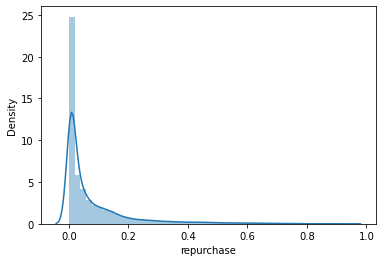

In [74]:
sns.distplot(prediction_analyse["repurchase"])

Choose the top 10 percent clients

In [75]:
prediction_analyse_10 = prediction_analyse.sort_values('repurchase',ascending=False)
top_10 = round(len(prediction_analyse['repurchase'])*0.1)
prediction_analyse_10 = prediction_analyse_10.iloc[:top_10]

In [76]:
prediction_analyse_10.tail(5)

,id_client,email_domain,civility,zip_code,card_subscription,repurchase,cum_amount,item_count,payment_gift,frequency,last_date,multicard,recency,days,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
38434,86907231,NaN,MME,NaN,NaT,0.216312,1973.31,552,1,33,2020-07-29 11:37:00,0.0,33 days 12:23:00,33,2,2,3,1,2,4,4,2,5,6,1,1
15136,30709299,HOTMAIL.FR,MME,83310,NaT,0.216304,1719.74,505,5,26,2020-07-31 16:33:00,0.0,31 days 07:27:00,31,0,0,0,4,1,2,1,5,5,6,2,0
24777,37594366,NaN,MME,14600,NaT,0.216299,729.52,381,0,61,2020-07-31 10:46:00,0.0,31 days 13:14:00,31,4,6,5,3,7,5,8,6,5,5,4,3
11610,21005490,HOTMAIL.FR,MME,41150,NaT,0.216233,2481.69,571,0,50,2020-07-25 12:25:00,0.0,37 days 11:35:00,37,7,5,5,5,6,4,1,5,2,1,3,6
16854,31904980,YAHOO.COM,MME,13008,NaT,0.216222,1578.11,631,6,48,2020-07-27 13:01:00,0.0,35 days 10:59:00,35,5,5,3,5,6,4,1,2,3,4,6,4


In [77]:
# Drop the clients who do not have email
prediction_analyse_top10 = prediction_analyse_10.dropna(subset=['email_domain'])
prediction_analyse_top10

,id_client,email_domain,civility,zip_code,card_subscription,repurchase,cum_amount,item_count,payment_gift,frequency,last_date,multicard,recency,days,month_1,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
28582,38641930,GMAIL.COM,M,21000,NaT,0.936105,25337.33,14517,53,500,2020-07-31 10:56:00,0.0,31 days 13:04:00,31,75,0,0,67,57,38,18,47,98,100,0,0
20230,34220442,GMAIL.COM,MME,71150,NaT,0.934498,4420.63,1892,8,335,2020-07-31 18:33:00,0.0,31 days 05:27:00,31,32,29,21,26,23,21,34,26,31,44,25,23
396,1135466,HOTEMAIL.FR,MME,94210,NaT,0.934481,8081.55,3909,13,384,2020-07-31 13:44:00,1.0,31 days 10:16:00,31,30,31,33,26,27,29,33,32,29,36,46,32
2082,4873352,GMAIL.COM,M,29200,2005-09-27,0.925577,11634.55,4129,101,448,2020-07-31 12:39:00,1.0,31 days 11:21:00,31,29,43,38,36,25,38,33,36,40,50,38,42
28736,38676454,LAPOSTE.NET,NR,70300,NaT,0.923020,4547.93,1798,14,259,2020-07-31 16:29:00,0.0,31 days 07:31:00,31,28,0,0,11,37,38,47,25,28,45,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,30454638,LAPOSTE.NET,M,70190,NaT,0.216385,816.35,357,0,22,2020-07-25 11:35:00,0.0,37 days 12:25:00,37,0,5,0,1,2,1,2,1,0,4,4,2
32858,80970000,HOTMAIL.COM,MME,87100,NaT,0.216344,4923.46,2002,10,54,2020-07-20 15:04:00,0.0,42 days 08:56:00,42,4,4,9,5,5,4,4,3,4,2,6,4
15136,30709299,HOTMAIL.FR,MME,83310,NaT,0.216304,1719.74,505,5,26,2020-07-31 16:33:00,0.0,31 days 07:27:00,31,0,0,0,4,1,2,1,5,5,6,2,0
11610,21005490,HOTMAIL.FR,MME,41150,NaT,0.216233,2481.69,571,0,50,2020-07-25 12:25:00,0.0,37 days 11:35:00,37,7,5,5,5,6,4,1,5,2,1,3,6


Analysis of the top 10% of client who have email

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the repurcahse probability')

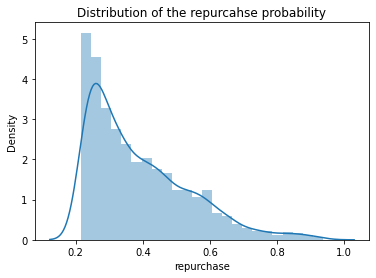

In [78]:
sns.distplot(prediction_analyse_top10["repurchase"]).set_title("Distribution of the repurcahse probability")

In [79]:
# Anlysis of the number of payment gift
gift = prediction_analyse_top10[prediction_analyse_top10["payment_gift"]<=6]
gift['payment_gift']=gift['payment_gift'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
gift_table = pd.crosstab(index=gift["payment_gift"],columns='count')
gift_proportion = gift_table/len(prediction_analyse_top10["payment_gift"])
gift_proportion

col_0,count
payment_gift,
0,0.196940
1,0.110632
2,0.088270
3,0.062377
4,0.058062
5,0.052962
6,0.045116


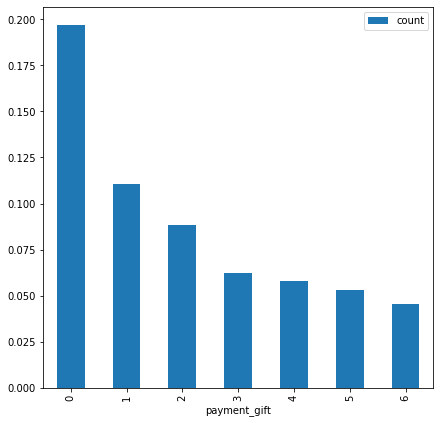

In [89]:
plt = gift_proportion.reset_index().plot(x='payment_gift', y='count', kind = 'bar', figsize = (7, 7))

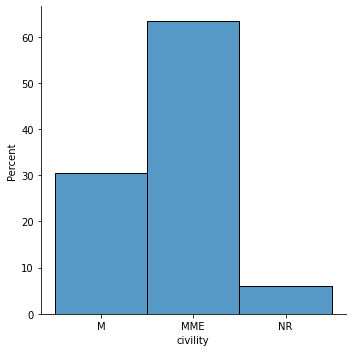

In [87]:
# Analysis of Sex
sns.displot(prediction_analyse_top10, x="civility",stat='percent')

In [86]:
# Posession of card
na_card=prediction_analyse_top10['card_subscription'].isna().sum()
card=len(prediction_analyse_top10['card_subscription'])-na_card
print(na_card)
print(card)
print((card/(card+na_card)))

2286
263
0.10317771675166731


In [92]:
# average amount of the first 10% customers with email
sum(prediction_analyse_top10['cum_amount'])/sum(prediction_analyse_top10['frequency'])

47.14148999425163

In [94]:
# Anlysis of the number of payment gift for test set
gift_table_test= pd.crosstab(index=inner_concat_test["payment_gift"],columns='count')
gift_proportion_test = gift_table_test/len(inner_concat_test["payment_gift"])
gift_proportion_test

col_0,count
payment_gift,
0,0.663941
1,0.138782
2,0.058171
3,0.034259
4,0.021742
...,...
158,0.000025
161,0.000025
181,0.000025
